In [9]:
### Import Functions
from DirectFunctions import import_fx_data, plot_forex, direct_daily_rets, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [10]:
### Call Function to Load in Rate Data
forex_pairs = ['USDCAD=X', 'AUDJPY=X']
start_date = '2023-07-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,USDCAD=X,AUDJPY=X
257,2024-06-26,1.36611,106.103996
258,2024-06-27,1.37045,106.719002
259,2024-06-28,1.36993,106.862999
260,2024-07-01,1.36727,107.370003
261,2024-07-02,1.37380,107.432999


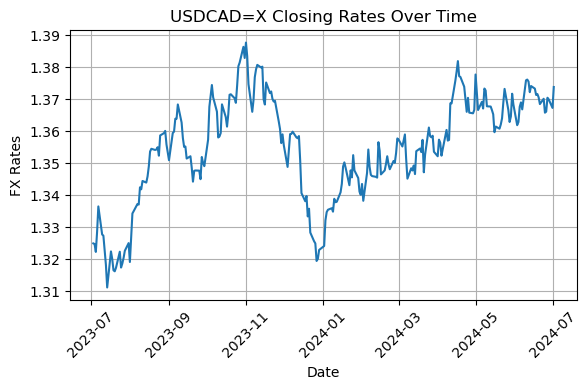

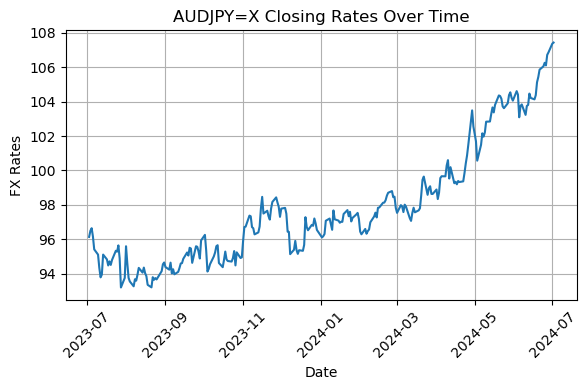

In [11]:
### Plot FX Pairs
plot_forex(forex_data, forex_pairs)


In [12]:
### Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  USDCAD=X  AUDJPY=X
0 2023-07-04 -0.000151  0.003703
1 2023-07-05 -0.001849  0.001555
2 2023-07-06  0.004719 -0.005070
3 2023-07-07  0.005984 -0.007707
4 2023-07-10 -0.006539 -0.003186


In [13]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(forex_pairs, daily_returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: -0.7039820715757097


In [14]:
### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, forex_pairs, daily_returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  703.9821
Recent Hedged Cumulative Returns:  256    1107.489441
257    1115.526935
258    1116.163299
259    1117.723986
260    1123.523871
dtype: float64
Recent Unhedged Cumulative Returns:  256    1031.026353
257    1034.301865
258    1033.909419
259    1031.901844
260    1036.830181
Name: USDCAD=X, dtype: float64


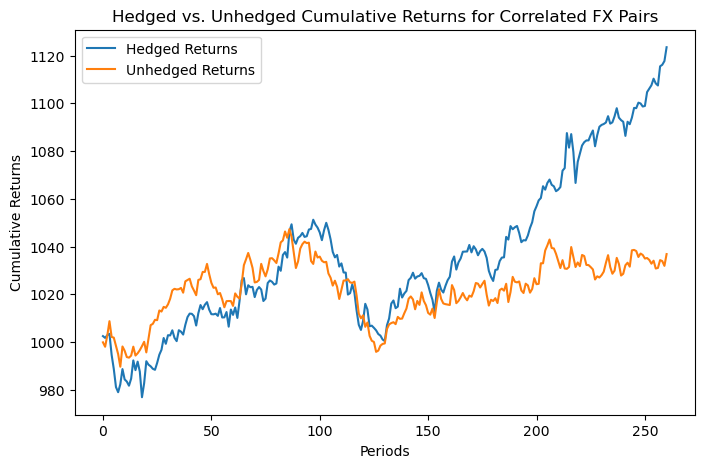

In [15]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [16]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)


Metric                                  Hedged        Unhedged
Total Returns                         123.5239         36.8302
Annualized Returns                    104.4393         32.3757
Mean Return                          1036.1846       1022.4340
Standard Deviation                     33.4982         12.4067
Sharpe Ratio                          491.0384       1308.2179

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 491.0384,
which means for every unit of risk, the hedged portfolio is generating 491.0384 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 1308.2179,
indicating that for every unit of risk, the unhedged portfolio is generating 1308.2179 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
